###GLOMAP: Global Structure-from-Motion

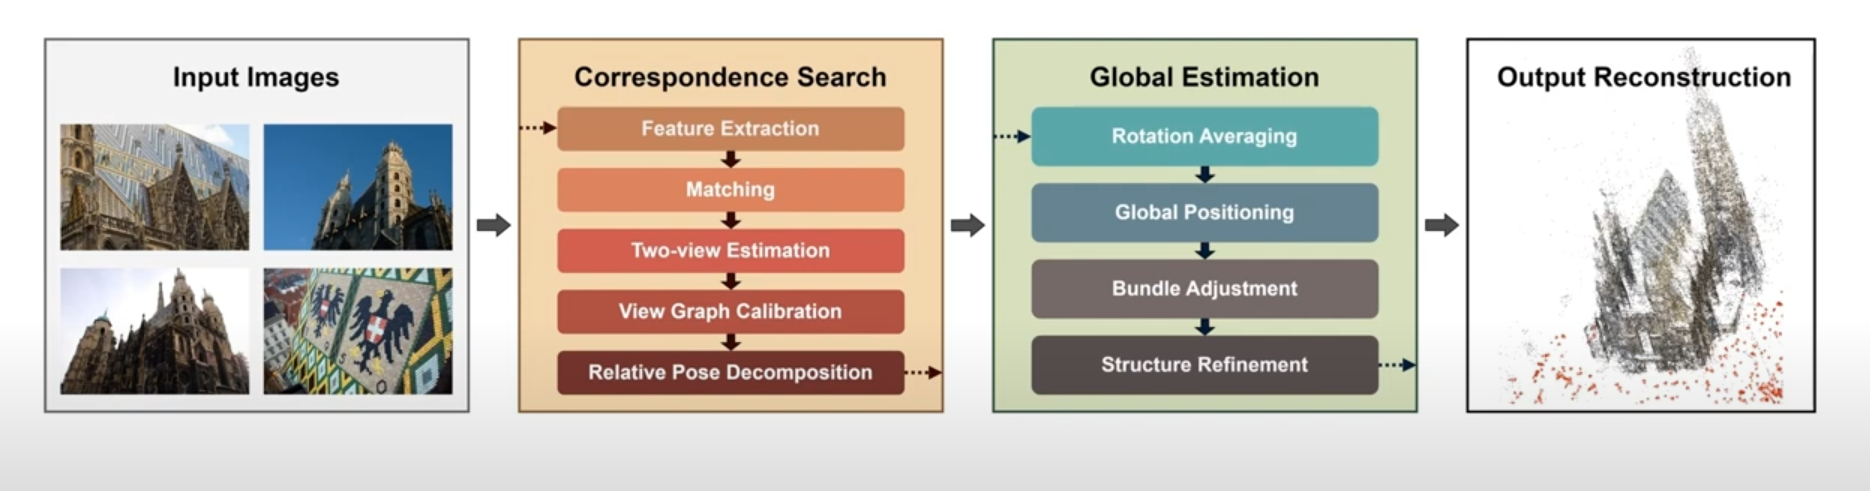

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvcc --version
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")

!nvidia-smi
!python --version  # Python version
!python -c "import torch; print(torch.__version__)"  # PyTorch version
!python -c "import torch; print(torch.version.cuda)"  # CUDA version

#minimum required version of cmake is 3.28
!cmake --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
CUDA available: True
CUDA device count: 1
Current CUDA device: 0
Device name: Tesla T4
Tue Mar 18 21:42:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4              


# Installing dependencies

In [2]:
!apt-get update
!apt-get install -y \
    git \
    build-essential \
    libboost-all-dev \
    libeigen3-dev \
    libgoogle-glog-dev \
    libgflags-dev \
    libfreeimage-dev \
    libceres-dev \
    libflann-dev \
    libsuitesparse-dev \
    libmetis-dev \
    ninja-build \
    libgl1-mesa-dev\
    libglu1-mesa-dev\
    libglew-dev\
    libx11-dev\
    libxxf86vm-dev\
    libxrandr-dev\
    libxinerama-dev\
    libxcursor-dev\
    libxi-dev\
    libcgal-dev\
    qtbase5-dev\
    qtchooser\
    qt5-qmake\
    qttools5-dev-tools\
    wget

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,378 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,678 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,236 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launc

# Get the GLOmap repo
and other dependencies for GLOmap

In [ ]:
# Clone and build GLOmap
!rm -rf /content/glomap
!git clone https://github.com/colmap/glomap.git /content/glomap
%cd /content/glomap
!mkdir -p build
%cd build
!cmake .. -GNinja
!ninja && ninja install



[288/288] Linking CXX executable glomap/glomap
[0/1] Install the project...
-- Install configuration: "Release"
-- Installing: /usr/local/bin/glomap
-- Set non-toolchain portion of runtime path of "/usr/local/bin/glomap" to ""


In [ ]:
# Create directory for GLOMAP installation in Drive
!mkdir -p /content/drive/MyDrive/glomap_install/lib

# Copy the GLOMAP binary
!cp /usr/local/bin/glomap /content/drive/MyDrive/glomap_install/

# Find and copy all relevant libraries
!cp /usr/local/lib/libglomap*.a /content/drive/MyDrive/glomap_install/lib/ 2>/dev/null || echo "No libglomap*.a files found"
!cp /usr/local/lib/libglomap*.so* /content/drive/MyDrive/glomap_install/lib/ 2>/dev/null || echo "No libglomap*.so files found"

print("GLOMAP has been saved to your Google Drive")

No libglomap*.a files found
No libglomap*.so files found
GLOMAP has been saved to your Google Drive


#Install GLOMAP from your saved build files:

In [15]:
def install_glomap():
    import subprocess
    try:
        result = subprocess.run(['glomap', '-h'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        if result.returncode == 0:
            print("GLOMAP is already installed")
            return True
    except:
        print("Installing GLOMAP...")

    # Create directories if they don't exist
    !sudo mkdir -p /usr/local/bin
    !sudo mkdir -p /usr/local/lib

    # Copy the GLOMAP binary
    !sudo cp /content/drive/MyDrive/glomap_install/glomap /usr/local/bin/

    # Copy all GLOMAP library files
    !sudo cp /content/drive/MyDrive/glomap_install/lib/* /usr/local/lib/ 2>/dev/null || echo "No library files to copy"

    # Make the binary executable
    !sudo chmod +x /usr/local/bin/glomap

    # Update the library cache
    !sudo ldconfig

    try:
        result = subprocess.run(['glomap', '-h'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        if result.returncode == 0:
            print("GLOMAP has been successfully installed")
            return True
        else:
            print("GLOMAP installation failed")
            return False
    except:
        print("GLOMAP installation failed")
        return False

# Usage
install_glomap()

GLOMAP is already installed


True

In [4]:
# Check if we can run GLOmap
!glomap -h

GLOMAP -- Global Structure-from-Motion

Usage:
  glomap mapper --database_path DATABASE --output_path MODEL
  glomap mapper_resume --input_path MODEL_INPUT --output_path MODEL_OUTPUT
Available commands:
  help
  mapper
  mapper_resume



###Setup

In [26]:
# Define directories
import os
import shutil
from pathlib import Path

# Define paths - using the same image directory from your COLMAP script
IMAGE_PATH = "/content/drive/MyDrive/colmap_data/images"
LOCAL_IMAGE_PATH = "/content/glomap_data/images"
OUTPUT_PATH = "/content/glomap_output"
DATABASE_PATH = "/content/glomap_data/database.db"

# Create directories
os.makedirs(LOCAL_IMAGE_PATH, exist_ok=True)
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Copy images to local storage for faster processing
!cp -r $IMAGE_PATH/* $LOCAL_IMAGE_PATH/


#colmap(Previously compiled COLMAP installation)

In [18]:
# Installing Dependencies for colmap
!apt-get update
!apt-get install -y \
    git \
    cmake \
    build-essential \
    libboost-all-dev \
    libfreeimage-dev \
    libgoogle-glog-dev \
    libgflags-dev \
    libglew-dev \
    libsuitesparse-dev \
    libceres-dev \
    libeigen3-dev \
    libflann-dev \
    libcgal-dev \
    libqt5opengl5-dev \
    qtbase5-dev \
    libmetis-dev

def install_colmap():
    import subprocess
    try:
        result = subprocess.run(['colmap', '-h'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        if result.returncode == 0:
            print("COLMAP is already installed")
            return True
    except:
        print("Installing COLMAP...")

    # Create directories if they don't exist
    !sudo mkdir -p /usr/local/bin
    !sudo mkdir -p /usr/local/lib

    # Copy the COLMAP binary
    !sudo cp /content/drive/MyDrive/colmap_install/colmap /usr/local/bin/

    # Copy all COLMAP library files
    !sudo cp /content/drive/MyDrive/colmap_install/lib/* /usr/local/lib/

    # Make the binary executable
    !sudo chmod +x /usr/local/bin/colmap

    # Update the library cache
    !sudo ldconfig

install_colmap()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

# Structure from motion(SFM)

In [ ]:
# Step 1: Feature extraction
print("Extracting features...")
!colmap feature_extractor \
        --database_path $DATABASE_PATH \
        --image_path $LOCAL_IMAGE_PATH \
        --SiftExtraction.use_gpu 1

Extracting features...
E0318 23:12:52.663045  4766 cudacc.cc:59] CUDA error at /content/colmap/src/colmap/util/cuda.cc:57 - CUDA driver version is insufficient for CUDA runtime version


In [ ]:
print("Matching features...")
# Using sequential_matcher for video frames as in your original script
!colmap sequential_matcher \
    --database_path $DATABASE_PATH \
    --SiftMatching.use_gpu 1 \
    --SiftMatching.max_num_matches 8192 \
    --SequentialMatching.overlap 20 \
    --SequentialMatching.quadratic_overlap 1

In [8]:
DATABASE_PATH_pre = "/content/drive/MyDrive/database.db"

!mkdir /content/glomap_data

!cp $DATABASE_PATH_pre /content/glomap_data/


In [24]:


DATABASE_PATH = "/content/glomap_data/database.db"
LOCAL_IMAGE_PATH = "/content/glomap_data/images"
OUTPUT_PATH = "/content/glomap_output"

print("Running GLOmap mapper...")
!glomap mapper \
    --database_path $DATABASE_PATH \
    --image_path $LOCAL_IMAGE_PATH \
    --output_path $OUTPUT_PATH/sparse


In [13]:
!cp -r "/content/glomap_output/sparse" "/content/drive/MyDrive/golmap_sparse"


In [28]:
!apt install -y xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 34 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

# Sparse Points

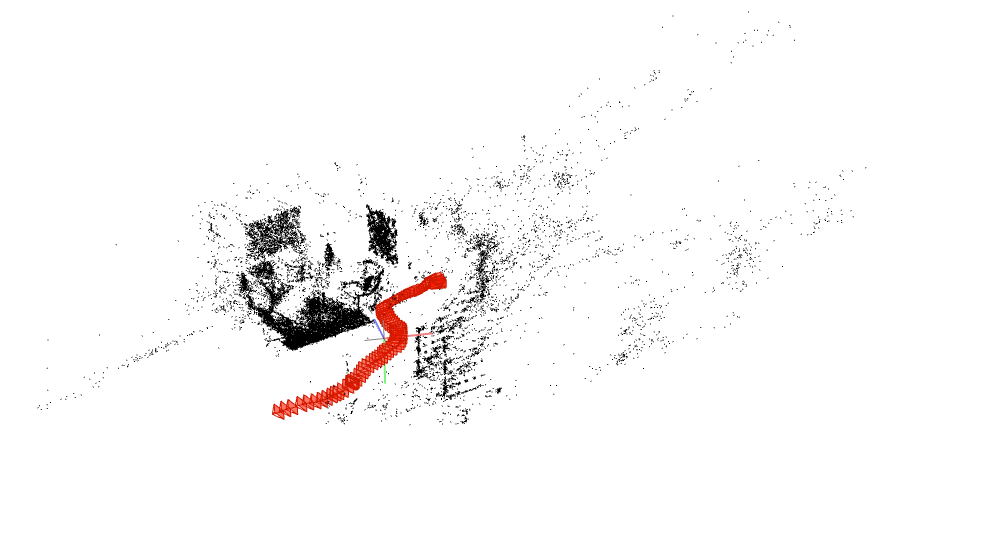